# Assignment 03: Rasters and Tables

For this assignment, you will be using Numpy, GDAL, and Pandas. Most of these questions  can be solved using methods shown in lecture. However, some cases will require you to search the internet for answers. This is intended because efficiently searching documentation or Stackoverflow is a requirement of modern programing. This assignment also requires you to obtain data (I will tell you where) and organize it correctly so that you can access is via relative paths (do not use absolute paths anywhere in this assignment).

To turn this in, create a PDF of your finished Jupyter notebook using Quarto (we will discuss this on Tuesday) and upload it to Canvas.


## Question 1

For this question, you will be using numpy to manipulate arrays in a way that works well for big data and will be using spatial tools to assess land-use change. Specifically, you will use data from a global, 300m resolution land-use, land-cover (LULC) map produced by ESACCI. They provide a wonderful time series of data from 1992-2019. If you want more information, check out their web viewer at https://maps.elie.ucl.ac.be/CCI/viewer/. Here you can view the data but also learn more about the classification regressions that uses time-series spectral data patterns to classify grid-cells into different types. I have extracted lulc maps for the country of Rwanda, which you will find in this assignment's data folder.

### Part a. 

Using the gdal package and the gdal.Open() function, open up the land-use, land-cover map for Rwanda in 2000. 

In this file, there is only 1 band in this file, so you can also access it with the GetRasterBand(1) function. Without reading the whole array, show how you can determine how many total grid-cells there are in this country.

In [38]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import zipfile

In [3]:
# 1A Answer

lulc_filename = 'rwanda_lulc_2000.tif' # Rwanda 2000 LULC file

data_directory = '../../../../data' # Directory containing the file
lulc_file_path = os.path.join(data_directory, lulc_filename)

# Check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path))

rwanda_2000_data = gdal.Open(lulc_file_path) # Open dataset

rwanda_2000_band = rwanda_2000_data.GetRasterBand(1) # Save band 1 of the raster

# Look at band as double check
print(rwanda_2000_band)

Does the file exist? True
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002711A45B240> >


## Please ignore the cell below

In [4]:
# Define function that takes in a TIFF and returns band 1 of its raster
'''
def get_tif_band(tif_file):
    data_directory = '../../../../data' # Directory containing the file
    tif_file_path = os.path.join(data_directory, tif_file)

    # Check if the file exists
    print("Does the file exist?", os.path.exists(tif_file_path))

    raster_data = gdal.Open(tif_file_path) # Open dataset

    raster_band = raster_data.GetRasterBand(1) # Save band 1 of the raster

    print('Raster band 1 successfully retrieved')

    return raster_band # Return the band

print(rwanda_2000_band1)
'''

'\ndef get_tif_band(tif_file):\n    data_directory = \'../../../../data\' # Directory containing the file\n    tif_file_path = os.path.join(data_directory, tif_file)\n\n    # Check if the file exists\n    print("Does the file exist?", os.path.exists(tif_file_path))\n\n    raster_data = gdal.Open(tif_file_path) # Open dataset\n\n    raster_band = raster_data.GetRasterBand(1) # Save band 1 of the raster\n\n    print(\'Raster band 1 successfully retrieved\')\n\n    return raster_band # Return the band\n\nprint(rwanda_2000_band1)\n'

### Part b.

Using the results of part a, read the whole array into memory as a numpy array (the default option when using the ReadAsArray() funciton), and plot it using the matplotlib imshow command. Add a nice title to the plot describing what it is.

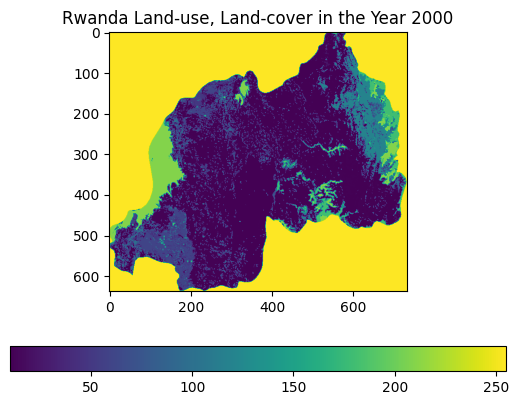

In [5]:
#1B Answer

# Get array from raster band
rwanda_array = rwanda_2000_band.ReadAsArray()
# rwanda_array # Look at array

# Plot raster 
plt.imshow(rwanda_array)
plt.title('Rwanda Land-use, Land-cover in the Year 2000')
plt.colorbar(orientation='horizontal')

# Show output
plt.show() 



### Part c.

Using the legend you find at https://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-QuickUserGuide-LC-Maps_v2-0-7.pdf reclassify the LULC into a simplified map where 1 = cropland (including any mosaic types that are partially cropland) and 0 = anything else. Plot this using imshow.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


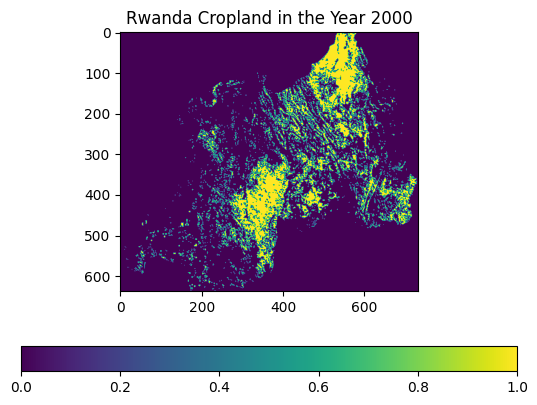

In [6]:
# 1C Answer

# Define function to mask non-cropland in the array
def reclassify_lulc(array, reclass_vals):
    masked_lulc = np.isin(array, reclass_vals)
    new_classify = np.where(masked_lulc, 1, 0)
    return new_classify

cropland_vals = [10, 20, 30, 40]

reclass_array = reclassify_lulc(rwanda_array, cropland_vals)

print(reclass_array)

# Plot raster 
plt.imshow(reclass_array)
plt.title('Rwanda Cropland in the Year 2000')
plt.colorbar(orientation='horizontal')

# Show output
plt.show() 

### Part d.

Repeat the process for the 2010 LULC map. Using this array with the one from part c, create a new array that records where there was cropland expansion (i.e., there is cropland in 2010 but not in 2000) and where there was cropland abandonment (cropland in 2000 but not in 2010). Save this classification in a single new array. Plot this last array. Optionally, add a legend indicating which values in the array denote expansion and abandonment using some variant of `ax.legend()'. 

In [7]:
# 2D Answer

lulc_filename = 'rwanda_lulc_2010.tif' # Rwanda 2000 LULC file

data_directory = '../../../../data' # Directory containing the file
lulc_file_path = os.path.join(data_directory, lulc_filename)

# Check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path))

rwanda_2010_data = gdal.Open(lulc_file_path) # Open dataset

rwanda_2010_band = rwanda_2010_data.GetRasterBand(1) # Save band 1 of the raster

# Look at band as double check
print(rwanda_2010_band)

Does the file exist? True
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002711CFC6CD0> >


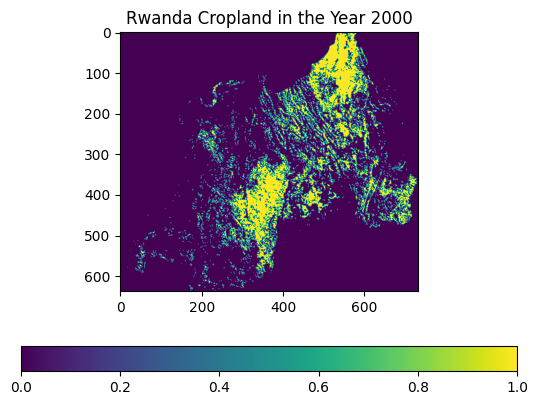

In [8]:
# 2D Continued

# Get array from raster band
rwanda_array_2010 = rwanda_2010_band.ReadAsArray()
# rwanda_array_2010 # Look at array

# Call reclass function for 2010 array
reclass_array_2010 = reclassify_lulc(rwanda_array_2010, cropland_vals)

# print(reclass_array_2010)

# Plot raster 
plt.imshow(reclass_array_2010)
plt.title('Rwanda Cropland in the Year 2000')
plt.colorbar(orientation='horizontal')

# Show output
plt.show() 

In [9]:
# 2D Continued

# Expansion: if cropland in 2010 but not 2000
crop_expansion = reclass_array_2010 - reclass_array
crop_expansion = np.where(crop_expansion == 1, 1, 0)

# Abandonment: if cropland in 2010 but not 2010
crop_abandonment = reclass_array - reclass_array_2010
crop_abandonment = np.where(crop_abandonment == 1, 1, 0)

### Part e.

Repeat the all the steps in part d, but with the 2015 LULC map, calculating the difference between 2015 and 2010.

In [10]:
# 2E Answer

lulc_filename = 'rwanda_lulc_2015.tif' # Rwanda 2000 LULC file

data_directory = '../../../../data' # Directory containing the file
lulc_file_path = os.path.join(data_directory, lulc_filename)

# Check if the file exists
print("Does the file exist?", os.path.exists(lulc_file_path))

rwanda_2015_data = gdal.Open(lulc_file_path) # Open dataset

rwanda_2015_band = rwanda_2015_data.GetRasterBand(1) # Save band 1 of the raster

# Look at band as double check
print(rwanda_2015_band)

rwanda_array_2015 = rwanda_2015_band.ReadAsArray()

reclass_array_2015 = reclassify_lulc(rwanda_array_2015, cropland_vals)

print(reclass_array_2015)

Does the file exist? True
<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x000002711D8ACC30> >
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
# 2E Continued

# Expansion: if cropland in 2015 but not 2010
crop_expansion_2015 = reclass_array_2015 - reclass_array_2010
crop_expansion_2015 = np.where(crop_expansion == 1, 1, 0)

# Abandonment: if cropland in 2010 but not 2015
crop_abandonment_2015 = reclass_array_2010 - reclass_array_2015
crop_abandonment_2015 = np.where(crop_abandonment == 1, 1, 0)

### Part f.

Use the two cropland binary rasters you processed above and make a new raster as follows:

0 = Never cropland
1 = Cropland in 2000 only
2 = Cropland in 2010 only
3 = Cropland in 2015 only
4 = Cropland in 2000 and 2010
5 = Cropland in 2000 and 2015
6 = Cropland in 2010 and 2015
7 = Cropland in 2000, 2010, and 2015

Plot this raster using imshow. Add a legend indicating what each value means.

A tip for you: when you are combining multiple logical statements in numpy, each individual logical statement must be surrounded by parentheses. Additionally, you have to use the bitwise logical operators & and | instead of the normal logical operators and and or (numpy requires this for specificity).

For example, np.where((a == 1) & (b == 2)) will return the indices where a is 1 and b is 2. If you do np.where(a == 1 & b == 2) or np.where((a == 1) and (b == 2)), you will get an error.

In [12]:
#2F Answer

# Initialize the criteria for the new array
logic_0 = ((reclass_array == 0) & (reclass_array_2010 == 0) & (reclass_array_2015 == 0))
logic_1 = ((crop_abandonment == 1) & (reclass_array_2015 == 0))
logic_2 = ((crop_expansion == 1) & (crop_abandonment_2015 == 1))
logic_3 = ((crop_expansion_2015 == 1) & (reclass_array == 0))
logic_4 = ((reclass_array == 0) & (crop_abandonment_2015 == 1))
logic_5 = ((crop_abandonment == 0) & (crop_expansion_2015 == 1))
logic_6 = ((crop_expansion == 0) & (reclass_array_2015 == 1))

# Initialize empty list
values = [] 

# Append values for each corresponding criteria
for i in range(0,7): 
    values.append(i)

print(values)

[0, 1, 2, 3, 4, 5, 6]


In [13]:
new_array = np.where(logic_0, 0, 
                np.where(logic_1, 1, 
                np.where(logic_2, 2,
                np.where(logic_3, 3,
                np.where(logic_4, 4,
                np.where(logic_5, 5,
                np.where(logic_6, 6, 7))))))
)

print(new_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
#2F Continued

crop_array = np.select([logic_0, logic_1, logic_2, logic_3, logic_4, logic_5, logic_6], values, 7)

# crop_array = np.where([logic_0, logic_1, logic_2, logic_3, logic_4, logic_5, logic_6], values, 7)

print(crop_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


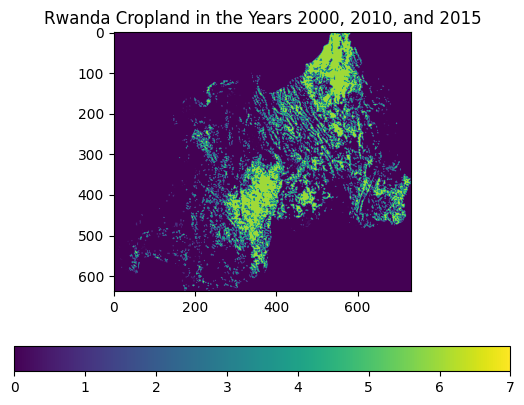

In [18]:
# Plot raster 
plt.imshow(new_array)
plt.title('Rwanda Cropland in the Years 2000, 2010, and 2015')
plt.colorbar(orientation='horizontal')

# Show output
plt.show() 

In [28]:
# Use numpy.unique to get unique values and their counts
unique_values, counts = np.unique(new_array, return_counts=True)

print(unique_values, '\n', counts)

[0 1 3 6 7] 
 [403348   1299    125  61359    153]


### Part g.

Describe your results. What do you notice about the spatial patterns of cropland expansion and abandonment? What do you think might be driving these patterns? Were they clustered in any specific area? Were the changes the same between 2000-2010 and 2010-2015?

#### Answer G

Generally, it looks like cropland is mostly expanding. There are more classification values of 6 than 1 which means more cropland in 2010 and 2015 only compared to just 2000. The expansion is most prominent in the northeast and central south regions of the country. Also, it appears that there is more expansion from 2010 to 2015 versus 2000 to 2010.


## Question 2

For this question, you will analyze crops using two datasets:

1. FAOSTAT Production_Crops_E_All_Data_(Normalized).csv. You could download it yourself but please use the one in the Class's Data Directory.
2. MAPSPAM (Spatial Production Allocation Mode). You can find teh download listing here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PRFF8V Download the readme and all of the files that end with .geotiff.zip. Unzip them and put them in a folder called spam in your Class's Data Directory. This is a big download, so it may take a while. Go watch a show or something. I don't know, what do people do nowadays for fun?3. 

Sidenote: MAPSPAM was a competitor to the EARTHSTAT data we showed in class before. However, MAPSPAM continues to be updated and is more open-source, so I am in the process of switching my whole GTAP-InVEST model to it. 

You will choose 5 crops that interest you, making sure to select crops that are in both MAPSPAM and FAOSTAT dataset. You will want to refer to the ReadMe_v2r0_Global.txt file, which was available at the same download site for MAPSPAM, to identify what each of the different crops mean. For each crop you choose (use a loop), calculate the global sum of production tonnage for irrigated crops, all rainfed crops combined but excluding subsistence crops, and for all crops together. Report those values via print(). 

Next, for the same crops, compare how the value you calculated above compares to the value in the FAOSTAT dataset. To do this, you will need to use Pandas to load the CSV and then figure out how to get just the production tonnage values for the crops you are interested in. Interpret your results for your crops. Is FAO higher/lower than MAPSPAM? Do you notice any patterns to the difference?

## Load FAOSTAT Data

In [33]:
# Question 2 answer

# Path to data directory
data_directory = '../../../../data'

# File name of ZIP file
zip_filename = 'Production_Crops_E_All_Data_(Normalized).zip'

zip_path = os.path.join(data_directory, zip_filename)

# Name of CSV file
# crop_production_filename = 'Production_Crops_E_All_Data_(Normalized).csv'

# Extract the CSV file from the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Assuming there is only one CSV file in the ZIP, if there are multiple, adjust accordingly
    csv_file_name = zip_ref.namelist()[0]
    zip_ref.extract(csv_file_name, path = data_directory)  # You can specify the extraction directory

In [36]:
# Read the CSV file using pandas
csv_path = os.path.join(data_directory, csv_file_name)
crop_production = pd.read_csv(csv_path, encoding = 'latin-1')

# Display the Pandas DataFrame
print(crop_production.head())

   Area Code         Area  Item Code                 Item  Element Code         Element  Year Code  Year Unit   Value Flag
0          2  Afghanistan        221  Almonds, with shell          5312  Area harvested       1975  1975   ha     0.0    F
1          2  Afghanistan        221  Almonds, with shell          5312  Area harvested       1976  1976   ha  5900.0    F
2          2  Afghanistan        221  Almonds, with shell          5312  Area harvested       1977  1977   ha  6000.0    F
3          2  Afghanistan        221  Almonds, with shell          5312  Area harvested       1978  1978   ha  6000.0    F
4          2  Afghanistan        221  Almonds, with shell          5312  Area harvested       1979  1979   ha  6000.0    F


In [8]:
# Look at the different crop options
crop_production['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Figs',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Fruit, stone nes',
       'Grapes', 'Linseed', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Millet', 'Nuts nes', 'Olives', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Pistachios', 'Plums and sloes',
       'Potatoes', 'Pulses nes', 'Rice, paddy',
       'Rice, paddy (rice milled equivalent)', 'Seed cotton',
       'Sesame seed', 'Spices nes', 'Sugar beet', 'Sugar cane',
       'Sunflower seed', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Cereals, Total', 'Citrus Fruit, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary', 'Beans, dry',
       'Beans,

## MAPSPAM Crop Production Summations

In [46]:
# Function for picking out files in the SPAM folder
def search_files (directory, crop_name):
    # Initialize dictionary for containing geotiff filenames and their data
    spam_data = {}
    # Iterate through all files in the specified directory
    for filename in os.listdir(directory):
        if crop_name in filename:
            file_path = os.path.join(directory, filename)
            dataset = gdal.Open(file_path) # Open file using GDAL
            spam_band = dataset.GetRasterBand(1)
            spam_array = spam_band.ReadAsArray()
            # spam_data.append((filename, spam_array)) # Append that file to the data list
            spam_data[filename] = spam_array # Add to dictionary

    return spam_data

In [32]:
# Set params for search files function
spam_directory = os.path.join(data_directory, 'spam')
# 5 crops also in MAPSPAM data (info found in ReadMe): 
# crop 1: wheat (whea)
wheat_files = search_files(spam_directory, 'WHEA') # Call search files function for wheat
print(len(wheat_files))

24


In [47]:
# Set params for search files function
spam_directory = os.path.join(data_directory, 'spam')

# 5 crops also in MAPSPAM data (info found in ReadMe): 
# crop 1: wheat (whea)
wheat_files = search_files(spam_directory, 'WHEA') # Call search files function for wheat
print(len(wheat_files))
# crop 2: maize (maiz)
maize_files = search_files(spam_directory, 'MAIZ') # Call search files function for wheat
print(len(maize_files))
# crop 3: barley (barl)
barley_files = search_files(spam_directory, 'BARL') # Call search files function for wheat
print(len(barley_files))
# crop 4: potato (pota)
potato_files = search_files(spam_directory, 'POTA') # Call search files function for wheat
print(len(potato_files))
# crop 5: cotton (cott)
cotton_files = search_files(spam_directory, 'COTT') # Call search files function for wheat
print(len(cotton_files))



24
24
24
24
24


In [51]:
# Look at the keys in one of the dictionaries
wheat_files.keys()

dict_keys(['spam2010V2r0_global_P_WHEA_H.tif', 'spam2010V2r0_global_P_WHEA_I.tif', 'spam2010V2r0_global_H_WHEA_A.tif', 'spam2010V2r0_global_H_WHEA_S.tif', 'spam2010V2r0_global_H_WHEA_R.tif', 'spam2010V2r0_global_P_WHEA_L.tif', 'spam2010V2r0_global_Y_WHEA_A.tif', 'spam2010V2r0_global_A_WHEA_H.tif', 'spam2010V2r0_global_A_WHEA_I.tif', 'spam2010V2r0_global_A_WHEA_L.tif', 'spam2010V2r0_global_Y_WHEA_S.tif', 'spam2010V2r0_global_Y_WHEA_R.tif', 'spam2010V2r0_global_Y_WHEA_H.tif', 'spam2010V2r0_global_Y_WHEA_I.tif', 'spam2010V2r0_global_A_WHEA_A.tif', 'spam2010V2r0_global_A_WHEA_S.tif', 'spam2010V2r0_global_A_WHEA_R.tif', 'spam2010V2r0_global_Y_WHEA_L.tif', 'spam2010V2r0_global_P_WHEA_A.tif', 'spam2010V2r0_global_H_WHEA_H.tif', 'spam2010V2r0_global_H_WHEA_I.tif', 'spam2010V2r0_global_H_WHEA_L.tif', 'spam2010V2r0_global_P_WHEA_S.tif', 'spam2010V2r0_global_P_WHEA_R.tif'])

In [58]:
# Define function for appending arrays containing a certain substring to a list
def keys_containing(my_dict, substring, my_list):
    # Iterate through dictionary
    for key, value in my_dict.items():
        # Look to see if substring is in any of the keys
        if substring in key:
            my_list.append(value) # Append value to list
            return

In [71]:
# Irrigated crop production to list

# Set params before calling keys containing function
irrigated_crops = [] # Initialize empty list
wheat_substr = 'P_WHEA_I.tif'
maize_substr = 'P_MAIZ_I.tif'
barley_substr = 'P_BARL_I.tif'
potato_substr = 'P_POTA_I.tif'
cotton_substr = 'P_COTT_I.tif'

# Call keys containing function for each crop dictionary
keys_containing(wheat_files, wheat_substr, irrigated_crops)
keys_containing(maize_files, maize_substr, irrigated_crops)
keys_containing(barley_files, barley_substr, irrigated_crops)
keys_containing(potato_files, potato_substr, irrigated_crops)
keys_containing(cotton_files, cotton_substr, irrigated_crops)

# Checking resulting array
wheat_arr = irrigated_crops[0]
print(np.unique(wheat_arr))

[-1.00000e+00  0.00000e+00  1.00000e-01 ...  5.57886e+04  5.58791e+04
  6.02159e+04]


In [76]:
# Rainfed crop production to list

# Set params before calling keys containing function
rainfed_crops = [] # Initialize empty list
wheat_substr = 'P_WHEA_R.tif'
maize_substr = 'P_MAIZ_R.tif'
barley_substr = 'P_BARL_R.tif'
potato_substr = 'P_POTA_R.tif'
cotton_substr = 'P_COTT_R.tif'

# Call keys containing function for each crop dictionary
keys_containing(wheat_files, wheat_substr, rainfed_crops)
keys_containing(maize_files, maize_substr, rainfed_crops)
keys_containing(barley_files, barley_substr, rainfed_crops)
keys_containing(potato_files, potato_substr, rainfed_crops)
keys_containing(cotton_files, cotton_substr, rainfed_crops)

# Checking resulting array
wheat_arr = rainfed_crops[0]
print(np.unique(rainfed_crops))

[-1.000000e+00  0.000000e+00  1.000000e-01 ...  1.907359e+05  2.711645e+05
  2.913119e+05]


In [77]:
# Rainfed subsistence crop production to list

# Set params before calling keys containing function
rainfed_s_crops = [] # Initialize empty list
wheat_substr = 'P_WHEA_S.tif'
maize_substr = 'P_MAIZ_S.tif'
barley_substr = 'P_BARL_S.tif'
potato_substr = 'P_POTA_S.tif'
cotton_substr = 'P_COTT_S.tif'

# Call keys containing function for each crop dictionary
keys_containing(wheat_files, wheat_substr, rainfed_s_crops)
keys_containing(maize_files, maize_substr, rainfed_s_crops)
keys_containing(barley_files, barley_substr, rainfed_s_crops)
keys_containing(potato_files, potato_substr, rainfed_s_crops)
keys_containing(cotton_files, cotton_substr, rainfed_s_crops)

# Checking resulting array
wheat_arr = rainfed_s_crops[0]
print(np.unique(rainfed_s_crops))

[-1.000000e+00  0.000000e+00  1.000000e-01 ...  1.176400e+05  1.183305e+05
  1.204145e+05]


In [78]:
# Total crop production to list

# Set params before calling keys containing function
all_crops = [] # Initialize empty list
wheat_substr = 'P_WHEA_A.tif'
maize_substr = 'P_MAIZ_A.tif'
barley_substr = 'P_BARL_A.tif'
potato_substr = 'P_POTA_A.tif'
cotton_substr = 'P_COTT_A.tif'

# Call keys containing function for each crop dictionary
keys_containing(wheat_files, wheat_substr, all_crops)
keys_containing(maize_files, maize_substr, all_crops)
keys_containing(barley_files, barley_substr, all_crops)
keys_containing(potato_files, potato_substr, all_crops)
keys_containing(cotton_files, cotton_substr, all_crops)

# Checking resulting array
wheat_arr = all_crops[0]
print(np.unique(all_crops))

[-1.000000e+00  0.000000e+00  1.000000e-01 ...  2.167289e+05  2.711645e+05
  2.913119e+05]


In [98]:
# Compute summations of crops by technology type
irrigation_sum_spam = np.sum(irrigated_crops)
rainfed_sum_spam = np.sum(rainfed_crops) - np.sum(rainfed_s_crops)
total_sum_spam = np.sum(all_crops)

print('This sum of production for irrigation crops in SPAM data =', irrigation_sum_spam, 'tonnes')
print('This sum of production for rainfed crops in SPAM data =', rainfed_sum_spam, 'tonnes')
print('This sum of production for all crops in SPAM data =', total_sum_spam, 'tonnes')


This sum of production for irrigation crops in SPAM data = 552048450.0 tonnes
This sum of production for rainfed crops in SPAM data = 1386525700.0 tonnes
This sum of production for all crops in SPAM data = 2037438300.0 tonnes


## FAOSTAT Crop Production Summation

In [87]:
# Look at the first couple rows of the df
print(crop_production.head())

   Area Code         Area  Item Code                 Item  Element Code   
0          2  Afghanistan        221  Almonds, with shell          5312  \
1          2  Afghanistan        221  Almonds, with shell          5312   
2          2  Afghanistan        221  Almonds, with shell          5312   
3          2  Afghanistan        221  Almonds, with shell          5312   
4          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit   Value Flag  
0  Area harvested       1975  1975   ha     0.0    F  
1  Area harvested       1976  1976   ha  5900.0    F  
2  Area harvested       1977  1977   ha  6000.0    F  
3  Area harvested       1978  1978   ha  6000.0    F  
4  Area harvested       1979  1979   ha  6000.0    F  


In [83]:
# Look at the different element options
crop_production['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [94]:
# Look at units
crop_production['Unit'].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

In [88]:
# Look at the different crop options
crop_production['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Figs',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Fruit, stone nes',
       'Grapes', 'Linseed', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Millet', 'Nuts nes', 'Olives', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Pistachios', 'Plums and sloes',
       'Potatoes', 'Pulses nes', 'Rice, paddy',
       'Rice, paddy (rice milled equivalent)', 'Seed cotton',
       'Sesame seed', 'Spices nes', 'Sugar beet', 'Sugar cane',
       'Sunflower seed', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Cereals, Total', 'Citrus Fruit, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary', 'Beans, dry',
       'Beans,

In [89]:
# Initialize list of crops used in MAPSPAM calculation
fao_crop_names = ['Wheat', 'Maize', 'Barley', 'Potatoes', 'Seed cotton']

In [91]:
# Calculate total production for the selected crops

# Initialize empty dictionary 
fao_summations = {}

# Iterate through all selected crop names
for crop in fao_crop_names:
    # Set condition that Element is production and Item is one of the selected crops
    condition = (crop_production['Element'] == 'Production') & (crop_production['Item'] == crop)
    # Sum rows of the df that meet the condition and add to dictionary
    fao_summations[crop] = crop_production.loc[condition, 'Value'].sum()

# View dictionary
print(fao_summations)

{'Wheat': 135483572119.0, 'Maize': 140801632812.0, 'Barley': 37176324544.0, 'Potatoes': 81022480691.0, 'Seed cotton': 14243953777.0}


In [97]:
# Look at total production results
fao_total_production = sum(fao_summations.values())

print('The total production of the previously selected crops is', fao_total_production, 'tonnes')

The total production of the previously selected crops is 408727963943.0 tonnes


In [112]:
# Create dict for MAPSPAM all tech production summations 

summed_spam_dict = {}
for i in range(0,5):
    summed_spam_dict[fao_crop_names[i]] = np.sum(all_crops[i])
print(summed_spam_dict)

{'Wheat': 666331300.0, 'Maize': 844649300.0, 'Barley': 127393920.0, 'Potatoes': 337903940.0, 'Seed cotton': 61159470.0}


## Conclusion

After comparing the total production from 5 selected crops that are in both MAPSPAM and FAOSTAT crop production data, the MAPSPAM total production for all technologies was 2,037,438,300 tonnes while the equivalent total from FAOSTAT data was 408,727,963,943. The two dominant crops in both datasets were wheat and maize. Also, cotton production had the lowest total tonnage in both datasets among the five crops that I selected.